MODELES DE BOOSTING : Adaboost,  LightGBM,  CatBoost,  XGBoost

In [50]:
import pandas as pd

In [52]:
df = pd.read_csv("data/boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [54]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [56]:
df.CHAS = df.CHAS.astype("category")
df.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD           int64
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
MEDV        float64
dtype: object

In [58]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

x = df.drop(columns = "MEDV")
y = df["MEDV"]

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size = 0.3, random_state = 42)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [62]:
# les variables quali/ avec les tstes ne peuvent pas etre inserer tel quel comme sa dans mon modèle, le dois les dicotomiser en variable binaire
# avec onehotencoder/ faire des tranfromation

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_columns = x_train.select_dtypes(include = "category").columns.tolist()

# transformer les variables categorielle
preprocessor = ColumnTransformer(
    transformers = [
        ("cat", OneHotEncoder(drop = "first"), cat_columns)
    ], 
    remainder = "passthrough"  # laisser les autres colonnes inchangées / j'ai pas tranformé les variables quanti
    
)

In [64]:
# les varaibles categortielle,  transformé plus haut sont appliquées et entrainer sur ma base d'entrainement x_train
# et appliquer sur ma base de test x_test/ donc j'ai des nouvelle bases tranformée
x_train_transformed = preprocessor.fit_transform(x_train)
x_test_transformed = preprocessor.transform(x_test)
x_train_transformed

# voici ma nouvelle base tranformé/, comme on voit au lieu d'avoir un dataframe , j'ai un array/ je n'ai meme plus le nom des colonnes

array([[0.00000e+00, 2.98500e-02, 0.00000e+00, ..., 1.87000e+01,
        3.94120e+02, 5.21000e+00],
       [0.00000e+00, 1.31580e-01, 0.00000e+00, ..., 1.78000e+01,
        3.93300e+02, 1.20400e+01],
       [0.00000e+00, 1.71420e-01, 0.00000e+00, ..., 1.79000e+01,
        3.96900e+02, 1.02100e+01],
       ...,
       [0.00000e+00, 1.50100e-02, 8.00000e+01, ..., 1.70000e+01,
        3.90940e+02, 5.99000e+00],
       [0.00000e+00, 1.11604e+01, 0.00000e+00, ..., 2.02000e+01,
        1.09850e+02, 2.32700e+01],
       [0.00000e+00, 2.28760e-01, 0.00000e+00, ..., 2.09000e+01,
        7.08000e+01, 1.06300e+01]])

In [66]:
#  etant donné que je souhaite avoir le nom de colonnes  .je recupère le nom des nouvelles colonnes apres tranformation
onehot_columns = preprocessor.named_transformers_["cat"].get_feature_names_out(cat_columns)
onehot_columns


array(['CHAS_1'], dtype=object)

In [68]:
# combiner le nom des colonnes categorielles transfromées et le nom colonnes numeriques restante
new_columns = list(onehot_columns) + list(x_train.select_dtypes(include = "number").columns)
new_columns


['CHAS_1',
 'CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [70]:
#  une vois que jai mes colonnes quali et quanti , je peux convertir mon array en dataframe avec les nouveaux noms des colonnes

x_train_transformed_df = pd.DataFrame(x_train_transformed, columns = new_columns, index = x_train.index)
x_test_transformed_df = pd.DataFrame(x_test_transformed, columns = new_columns, index = x_test.index)

x_train_transformed_df

,CHAS_1,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.0,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.0,0.13158,0.0,10.01,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.0,0.17142,0.0,6.91,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,0.0,1.05393,0.0,8.14,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,0.0,15.57570,0.0,18.10,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.0,0.17120,0.0,8.56,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.0,0.29916,20.0,6.96,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.0,0.01501,80.0,2.01,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,0.0,11.16040,0.0,18.10,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [76]:
# nota: shape pour verifier le nombre de ligne et colonnes de ma base

x_train_transformed_df.shape


(354, 13)

- avec ce précedent code on vient d'avoir une base de données qui a été PREPROCESSE

que se soit la base d'apprentissage x_train ou la base de test x_test

# 2- ADABOOST

c'est le modèle de boosting le plus basique, en gros c'est un algorithme qui ne base tjour sur le principe de la sagèsse de la foule: au lieu d'un seule modèle il va consulter plusieurs pour ameliorer les performance d'un modeles faible

- objectif: Ameliorer les performances d'un modèle faible/ pas robuste ( exemple de modèle faible= un arbre de decision avec seulement 2 feuilles/ 2 noeuds par exemple) ,   cad ou il y'a juste une seule variable)

- il s'applique sur les modèle faible, ces modeles là qui ne font pas mieux que le hasard/ et dans la pratique c'est sur l'arbre de decision qui n'est pas très profond qu'on l'applique( donc au debut deja on a un underfitting: l'arbre n'est pas assez preci pour faire des bonne prediction ) on doit juste l'ameliorer



- principe du booting en generale:

  je fais plusieurs modèle et a  chaque iteration, j'ameliore la qualité de prediction des observations qui ont été mal predicte

   question a ce poser quand on fait du boosting/ les choses qu'on doit controler:

- combien d'iteration / ou  arbre de decision/ le nombre de modèle que  je dois mettre en place?
- on sait que  a chaque interation il y'a une ponderation qui a changé. A quel point cette ponderation sera important dans mon modèle final?(learning rate)

 pour cela c'est plus une procedure par TATONEMMENT
- je commence par 50 modeles/ 200 modeles/ 100 modeles..300  et je choisit a la fin le nombre de modèle qui maximise mon critère

  en gros chaque nouveau modèle est ajouté au modèle precedent/, il faut dont s'arreter a un moment pour eviter l'overfitting

In [78]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# adaboost sans optimisation des parametres

attention: ne jamais faire un modèle adaboost comme sa , sans optimiser les paramètres

In [80]:
# créer et entrainer un modèle Adaboost de base

# la j'ai fait man adaboost sans aucune optimisation/ on a fait plusieurs arbres de decicsion, je ne sais meme pas le nombre

ada_model = AdaBoostRegressor(random_state = 42)
ada_model.fit(x_train_transformed_df, y_train)

AdaBoostRegressor(random_state=42)

In [82]:
# faisons la prediction/ sur la base d'apprentissage et sur la base de test aussi
y_pred_train_ada = ada_model.predict(x_train_transformed_df)
y_pred_test_ada = ada_model.predict(x_test_transformed_df)

### Evaluation des performances

In [84]:
# calcul des metriques 

# fonction pour calculer le MAPE
def mean_absolute_percentage_erreur(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

# calcul des metriques sur ma base train

train_correlation = np.corrcoef(y_train, y_pred_train_ada)[0,1]
train_R2 = r2_score(y_train, y_pred_train_ada)
train_RMSE = np.sqrt(mean_squared_error(y_train, y_pred_train_ada ))
train_MAE = mean_absolute_error(y_train, y_pred_train_ada )
train_MAPE = mean_absolute_percentage_erreur(y_train, y_pred_train_ada )


#  calcul des metriques sur ma base de  test
                     
test_correlation = np.corrcoef(y_test, y_pred_test_ada)[0,1]
test_R2 = r2_score(y_test, y_pred_test_ada)
test_RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test_ada )) # c'est la difference entre la valeur observée et la valeur predite
test_MAE = mean_absolute_error(y_test, y_pred_test_ada )
test_MAPE = mean_absolute_percentage_erreur(y_test, y_pred_test_ada)


results = pd.DataFrame({
    "Metrique": ["correlation", "R2", "RMSE", "MAE", "MAPE"],
    "train": [train_correlation, train_R2, train_RMSE, train_MAE,  train_MAPE ],
    "test": [test_correlation, test_R2, test_RMSE,  test_MAE, test_MAPE ]
})

results = results.round(4)

results

,Metrique,train,test
0,correlation,0.9599,0.8976
1,R2,0.9124,0.7953
2,RMSE,2.7741,3.9052
3,MAE,2.2444,2.6808
4,MAPE,12.4131,15.1982


NOTA: on observe deja que en terme de R2 on est moins bon qu'une foret aleatoire

# adaboost avec optimisation des paramètres

quand on fait du boosting les 2 parametres principaux a optimiser

# n_estimators

le paramètre n_estimators definit le nombre de modèles faibles(arbre de decision) a uiliser. plus le nombre est elevé plus le modèle sera complexe.

avec ce nombre justement il faut donc trouver un equilibre entre le under/overfitting. pour cela on procède par tatonnement

# learning_rate

c'est la parametre qui controle le taux d'apprentissage = cad la ponderation qu'on doit appliquer a chaque fois qu'on va entrainer un arbre de decision
de tel maniere que chaque modèle faible tente a corriger les erreurs des modèles précédent. / cette ponderation doit etre la meme a chaque fois

comment on les optimise ces paramètres?

on le fait generalement en utilisant une sorte de:

- recherche sur grille ou recherche aleatoire
  
qui teste differentes combinaisons de paramètre pour trouver celle qui donne de meilleur performance sur ma base


In [86]:
from sklearn.model_selection import GridSearchCV
# definir la grille de parametres a optimiser
# learning_rate = le taux d'apprentissage va de 0 a 1 en general
# max_depth = l'arbre doit etre très faible, idealement 1 coupure / pas tres profond
param_grid ={
    "n_estimators": [50, 100, 200, 300, 500],
    "learning_rate": [0.01, 0.1, 0.5, 0.6, 0.7, 0.8, 1.0]
}

# créer mon modele adaboost: qui va en fonction des combinaisons de learning rate trouver le modele qui a les meilleurs performances/ en general 
# les performances c'est sur la base de test

ada_model = AdaBoostRegressor(random_state = 42)


In [88]:
# creere la recherche par grille
# cv = 5, = validation croisée= cava diviser ma base en 5 et a chaque etape ca va entrainer le modele sur 4 proportions et tester les performances sur
# l'autre proportion

# scoring = ca va trouver les parametres (n_estimators)et le (leraning_rate) qui va maximiser le scoring, 
# en REGRESSION l'indicateur approprié du scoring c'est l'opposé du mean_quare_error cad = neg_mean_square_error

Grid_search_ada = GridSearchCV(estimator = ada_model, param_grid = param_grid,
                               cv = 5, scoring = "neg_mean_squared_error")

# entrainer le modèle avec la recherche par grilles pour trouver le meilleur parametres
Grid_search_ada.fit(x_train_transformed_df, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 0.6, 0.7, 0.8, 1.0],
                         'n_estimators': [50, 100, 200, 300, 500]},
             scoring='neg_mean_squared_error')

In [90]:
# meilleur parametre obtenue
print(f"meilleurs paramètres : {Grid_search_ada.best_params_}")

# j'extraire le meilleur modèle correspondand a ces meilleurs paramètres

best_ada_model = Grid_search_ada.best_estimator_

meilleurs paramètres : {'learning_rate': 0.1, 'n_estimators': 100}


conclusion
on vient de dvelopper notre model adaboost: on a fait plusieur iterations, ici on a 100 modèles , on a un learning_rate de 0,1

c'est un peut abstrait en fait, comment expliquer sa aux metiers?

- la seule chose qu'on peut expliquer c'est ce qu'on appelle l' IMPORTANCE DES VARIABLES: en gros dans la prediction quel etait les variables les plus importante et les plus pertinantes en generale.

  NOTA: c'est vrai que avec les modeles de boosting/ arbres de deision / et forest aleatoire:

  on a pas besoin de faire le processus de selection des variables pertinantes, car les modeles en soit selectionne eux meme automatiquement les variables les plus pertinantes pour mettre sur pied le modèle.

  Mais c'est toujours important de le faire , pour mieux expliquer aux metiers, quelles sont les varibles les plus importantes et les plus pertinante qui ont joué dans ma prediction


   Features  Importances
0    CHAS_1     0.000195
1      CRIM     0.027799
2        ZN     0.001182
3     INDUS     0.005470
4       NOX     0.031508
5        RM     0.297117
6       AGE     0.004036
7       DIS     0.104357
8       RAD     0.001705
9       TAX     0.002068
10  PTRATIO     0.033505
11        B     0.008804
12    LSTAT     0.482255


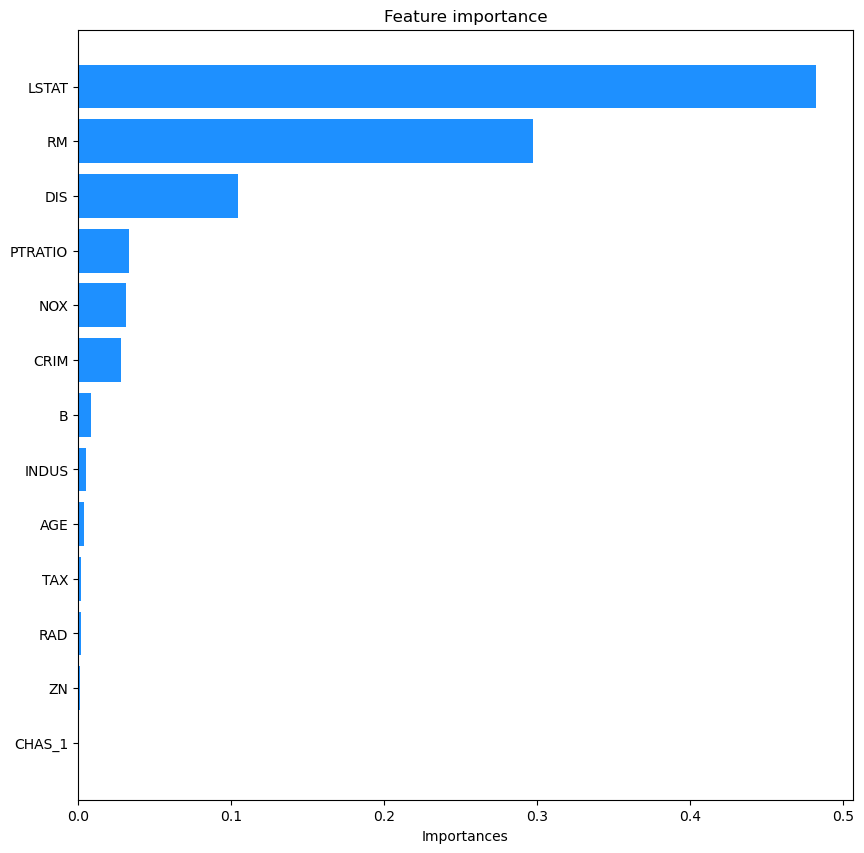

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
# optention de l'importance des variables

features_importances = best_ada_model.feature_importances_

# creation du dataframe pour l'importances des variables
importances_df = pd.DataFrame({
    "Features": x_train_transformed_df.columns,
    
    "Importances": features_importances
    
})

# afficher le dataframe 
print(importances_df)

# creation du graphique pour l'importance des variables/ crier les variables par ordre decroissant d'importance
importances_df = importances_df.sort_values(by = "Importances", ascending = False)

plt.figure(figsize= (10,10))
plt.barh(importances_df["Features"], importances_df["Importances"], color = "dodgerblue")
plt.title("Feature importance")
plt.xlabel("Importances")
plt.gca().invert_yaxis()  # inverse l'axe des y avoir les variables les plus important en haut
plt.show()


interpretation: 

NOTA :les modeles qui ne sont pas interpretables comme le boosting, on les interprete en fait avec le features_importances, c'est sur sa qu'on va communiquer en géneral.

+ la  maintenant on peut dire au metiers, ok on a fait un boosting, mais sache queles variables qui jouent beaucoup sur la prediction du prix immobilier c'est:
  
                   . LSTAT(le pourcentage de la population de statut socio economique inferieur)

                   . RM (le nombre de pièce par logement)

                   . DIS

                   . PTRATIO


In [95]:
#  une fois on a notre modele faisons la prediction/ sur la base d'apprentissage et sur la base de test aussi
# on prend un nouveau bien et on predire la valeur , x_test justement c'est une base nouvelle, étrangére a la base d'apprentissage
y_pred_train_ada_opt = best_ada_model.predict(x_train_transformed_df)
y_pred_test_ada_opt = best_ada_model.predict(x_test_transformed_df)

In [97]:
# calcul des metriques / indicateurs de performances 

# fonction pour calculer le MAPE
def mean_absolute_percentage_erreur(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

# calcul des metriques sur ma base train

train_correlation = np.corrcoef(y_train, y_pred_train_ada_opt)[0,1]
train_R2 = r2_score(y_train, y_pred_train_ada_opt)
train_RMSE = np.sqrt(mean_squared_error(y_train, y_pred_train_ada_opt ))
train_MAE = mean_absolute_error(y_train, y_pred_train_ada_opt )
train_MAPE = mean_absolute_percentage_erreur(y_train, y_pred_train_ada_opt )


#  calcul des metriques sur ma base de  test
                     
test_correlation = np.corrcoef(y_test, y_pred_test_ada_opt)[0,1]
test_R2 = r2_score(y_test, y_pred_test_ada_opt)
test_RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test_ada_opt )) # c'est la difference entre la valeur observée et la valeur predite
test_MAE = mean_absolute_error(y_test, y_pred_test_ada_opt )
test_MAPE = mean_absolute_percentage_erreur(y_test, y_pred_test_ada_opt)


results = pd.DataFrame({
    "Metrique": ["correlation", "R2", "RMSE", "MAE", "MAPE"],
    "train": [train_correlation, train_R2, train_RMSE, train_MAE,  train_MAPE ],
    "test": [test_correlation, test_R2, test_RMSE,  test_MAE, test_MAPE ]
})

results = results.round(4)

results

,Metrique,train,test
0,correlation,0.9572,0.8847
1,R2,0.9093,0.7755
2,RMSE,2.8228,4.0903
3,MAE,2.2483,2.8215
4,MAPE,12.1853,15.4542


conclusion: adaboost est performant , mais pour l'instant le meilleur modèle c'est la forest aleatoire 

# 3- XGBOOST

## XGboost basique sans optimisation(XGboost par defaut)

reconnu comme le modèle le plus performant par excellence
c'est toujours un type de boosting, le principe de fonctionement est exactement le meme


NOTA
-  dans le boosting, il y'a ce qu'on appelle la REGULATION qui est intégrée pour pouvoir reduire l'overfitting

  difference entre ADABOOST ET XGBOOST c'est:

                                      . le type d'optimisation qui est mis en place a l'interieur(dans le XGboost on a la decente de gradiance)
                                      
                                      . l'introduction  d'un parametre de regulation dans le XGboost pour eviter l'overfitting

In [86]:
# installation du package xgboost
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 435.7 kB/s eta 0:04:47
   ---------------------------------------- 0.1/124.9 MB 544.7 kB/s eta 0:03:50
   ---------------------------------------- 0.1/124.9 MB 726.2 kB/s eta 0:02:52
   ---------------------------------------- 0.2/124.9 MB 913.1 kB/s eta 0:02:17
   ---------------------------------------- 0.3/124.9 MB 1.0 MB/s eta 0:02:00
   ---------------------------------------- 0.4/124.9 MB 1.3 MB/s eta 0:01:33
   ---------------------------------------- 0.5/124.9 MB 1.4 MB/s eta 0:01:29
   ---------------------------------------- 0.6/124.9 MB 1.6 MB/s eta 0:01:19
   ---------------------------------------- 0.6/124.9 MB 1.6 MB/s eta 0:01:20
   ---------------------------------------- 0.8/124.9 MB 1.7 MB/s eta 0:01:14
   ---------------------------------------- 0.8/124.9 MB 1.7 MB/s eta 

In [99]:
import xgboost as xgb

# parametres de l'algorithme /  se sont les paramtre par defaut que je doe car ici c'est sans optimisation
params = {
    "max_depth": 3,  # la profondeur de l'arbre
    "eta": 0.3,    # le taux d'apprentissage
    "objective": "reg:squarederror", # fonction de perte pour la regression (erreur quadratique moyenne): c'est cette fonction la qu'on utilise pour 
                                     # realiser ces optimisation en general: c'est comme le RMSE mais cette fois ci c'est utiliser pour entrainer les
                                     # les parametres de l'algorithme en fait, basé sur la decente de gradient
    
    "n_estimators": 100            # le nombre d'arbre a construire
}

# creer et entrainer le modèle XGboost
# ** pour passer l'ensemble des paramtres etabli plus haut
xgb_model = xgb.XGBRegressor(**params, random_state = 42)

# entrainer le modele
xgb_model.fit(x_train_transformed_df, y_train )

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.3, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

nota: la j'ai entrainé mon modele sans optimiser les paramètres

In [101]:
# une fois entrainer le modele on peut faire la prediction
y_pred_train_xgb = xgb_model.predict(x_train_transformed_df)
y_pred_test_xgb = xgb_model.predict(x_test_transformed_df)





# calcul des metriques / indicateurs de performances 

# fonction pour calculer le MAPE
def mean_absolute_percentage_erreur(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

# calcul des metriques sur ma base train

train_correlation = np.corrcoef(y_train, y_pred_train_xgb)[0,1]
train_R2 = r2_score(y_train, y_pred_train_xgb)
train_RMSE = np.sqrt(mean_squared_error(y_train, y_pred_train_xgb ))
train_MAE = mean_absolute_error(y_train, y_pred_train_xgb )
train_MAPE = mean_absolute_percentage_erreur(y_train, y_pred_train_xgb )


#  calcul des metriques sur ma base de  test
                     
test_correlation = np.corrcoef(y_test, y_pred_test_xgb)[0,1]
test_R2 = r2_score(y_test, y_pred_test_xgb)
test_RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test_xgb )) # c'est la difference entre la valeur observée et la valeur predite
test_MAE = mean_absolute_error(y_test, y_pred_test_xgb )
test_MAPE = mean_absolute_percentage_erreur(y_test, y_pred_test_xgb)


results = pd.DataFrame({
    "Metrique": ["correlation", "R2", "RMSE", "MAE", "MAPE"],
    "train": [train_correlation, train_R2, train_RMSE, train_MAE,  train_MAPE ],
    "test": [test_correlation, test_R2, test_RMSE,  test_MAE, test_MAPE ]
})

results = results.round(4)

results


,Metrique,train,test
0,correlation,0.9981,0.9426
1,R2,0.9962,0.8882
2,RMSE,0.5808,2.8868
3,MAE,0.4454,2.0342
4,MAPE,2.3105,10.6596


   Features  Importances
0    CHAS_1     0.013971
1      CRIM     0.051864
2        ZN     0.001497
3     INDUS     0.015385
4       NOX     0.027689
5        RM     0.275505
6       AGE     0.007010
7       DIS     0.062871
8       RAD     0.040569
9       TAX     0.036070
10  PTRATIO     0.053701
11        B     0.010873
12    LSTAT     0.402997


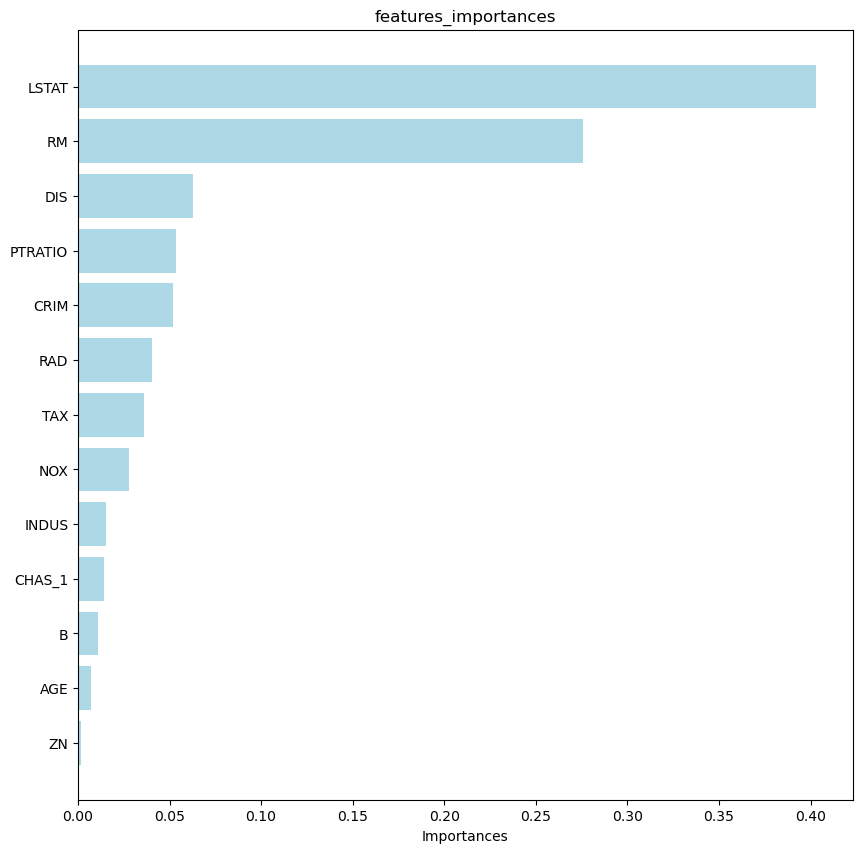

In [103]:
# jai la prediction mais je ne sais pas quel sont les variables qui ont joué dans la prediction

# importances des variables

features_importances = xgb_model.feature_importances_

importance_df = pd.DataFrame({
    "Features": x_train_transformed_df.columns,
    "Importances": features_importances
})

print(importance_df)

# trier les variaables par ordre decroissant
importance_df = importance_df.sort_values(by = "Importances", ascending = False)

plt.figure(figsize = (10, 10))
plt.barh(importance_df["Features"], importance_df["Importances"], color = "lightblue")
plt.title("features_importances")
plt.xlabel("Importances")
plt.gca().invert_yaxis()
plt.show()

## XGBOOST avec optimisation

In [105]:
from sklearn.model_selection import GridSearchCV

In [109]:
# Définition des paramètres à optimiser
param_grid = {
    # max_depth est la profondeur maximale de chaque arbre. Une valeur plus élevée rendra le modèle plus complexe et pourrait entraîner un surapprentissa
    # l'arbre ne doit pas etre profon  alla base , le modèle doit etre le plus faible possible, idealement avec une profondeur de 2
    # car on part du principe que le boosting a pour but d'ameliorer les performance des modeles très faibles
    'max_depth': [1, 2, 3],
    
    # learning_rate (ou taux d'apprentissage) = la ponderation qu'on applique a chaque fois qu'on entraine un arbre de decision de tel en sorte que
    # qu'il corige les erreur des modple precedent .
    'learning_rate': [0.01, 0.1, 0.05, 0.2],
    
    # n_estimators est le nombre d'arbres à construire.
    'n_estimators': [100, 200, 300, 500, 1000],
}

# Création du modèle XGBoost pour la régression
model = xgb.XGBRegressor(random_state=42)



In [111]:
# Création de l'objet GridSearch
# n_jobs=-1, verbose=2 = ces 2 element c'est plus les truc d'affichage que sa n'affiche pas les point d'entrainement en fait
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Entraînement du modèle avec optimisation des hyperparamètres
grid_search.fit(x_train_transformed_df, y_train)



Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.05, 0.2],
                         'max_depth': [1, 2, 3],
                         'n_estimators': [100, 200, 300, 500, 1000]},
             scoring='neg_mean_squared_error', verbose=2)

In [113]:
# Affichage des meilleurs paramètres
print(f"Meilleurs paramètres : {grid_search.best_params_}")

# extraire le meilleur modele
best_model = grid_search.best_estimator_

Meilleurs paramètres : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [115]:
# faisons les predictions sur nos 2 bases

y_pred_train_xgb_opt = best_model.predict(x_train_transformed_df)
y_pred_test_xgb_opt = best_model.predict(x_test_transformed_df)

In [117]:
# calcul des metriques / indicateurs de performances 

# fonction pour calculer le MAPE
def mean_absolute_percentage_erreur(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

# calcul des metriques sur ma base train

train_correlation = np.corrcoef(y_train, y_pred_train_xgb_opt)[0,1]
train_R2 = r2_score(y_train, y_pred_train_xgb_opt)
train_RMSE = np.sqrt(mean_squared_error(y_train, y_pred_train_xgb_opt ))
train_MAE = mean_absolute_error(y_train, y_pred_train_xgb_opt )
train_MAPE = mean_absolute_percentage_erreur(y_train, y_pred_train_xgb_opt )


#  calcul des metriques sur ma base de  test
                     
test_correlation = np.corrcoef(y_test, y_pred_test_xgb_opt)[0,1]
test_R2 = r2_score(y_test, y_pred_test_xgb_opt)
test_RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test_xgb_opt )) # c'est la difference entre la valeur observée et la valeur predite
test_MAE = mean_absolute_error(y_test, y_pred_test_xgb_opt )
test_MAPE = mean_absolute_percentage_erreur(y_test, y_pred_test_xgb_opt)


results = pd.DataFrame({
    "Metrique": ["correlation", "R2", "RMSE", "MAE", "MAPE"],
    "train": [train_correlation, train_R2, train_RMSE, train_MAE,  train_MAPE ],
    "test": [test_correlation, test_R2, test_RMSE,  test_MAE, test_MAPE ]
})

results = results.round(4)

results


,Metrique,train,test
0,correlation,0.9949,0.9441
1,R2,0.9896,0.8909
2,RMSE,0.9547,2.8511
3,MAE,0.7403,2.0269
4,MAPE,3.7746,10.4557


CONCLUSION: effectivement XGBOOST avec optimisation : perfome encore mieux et plus que tous les autres modèle

- R2_test = 89%  contre  R2_test = 82% de la foret aleatoire

- RMSE_test = 2.85  contre  RMSE_test = 3.32 de la foret aleatoire


NOTA:  il faut tjr optimiser

- sans optimisation : on avait un peu d'overfitting vu que les performances sur la bases de test etaient plus faible
  
- avec optimisation :  on en a beaucoup moins car les performances sur la base de test sont plus fort

   Features  Importances
0    CHAS_1     0.018771
1      CRIM     0.027050
2        ZN     0.004775
3     INDUS     0.008651
4       NOX     0.043487
5        RM     0.242223
6       AGE     0.012231
7       DIS     0.063983
8       RAD     0.013037
9       TAX     0.020245
10  PTRATIO     0.069880
11        B     0.009203
12    LSTAT     0.466464


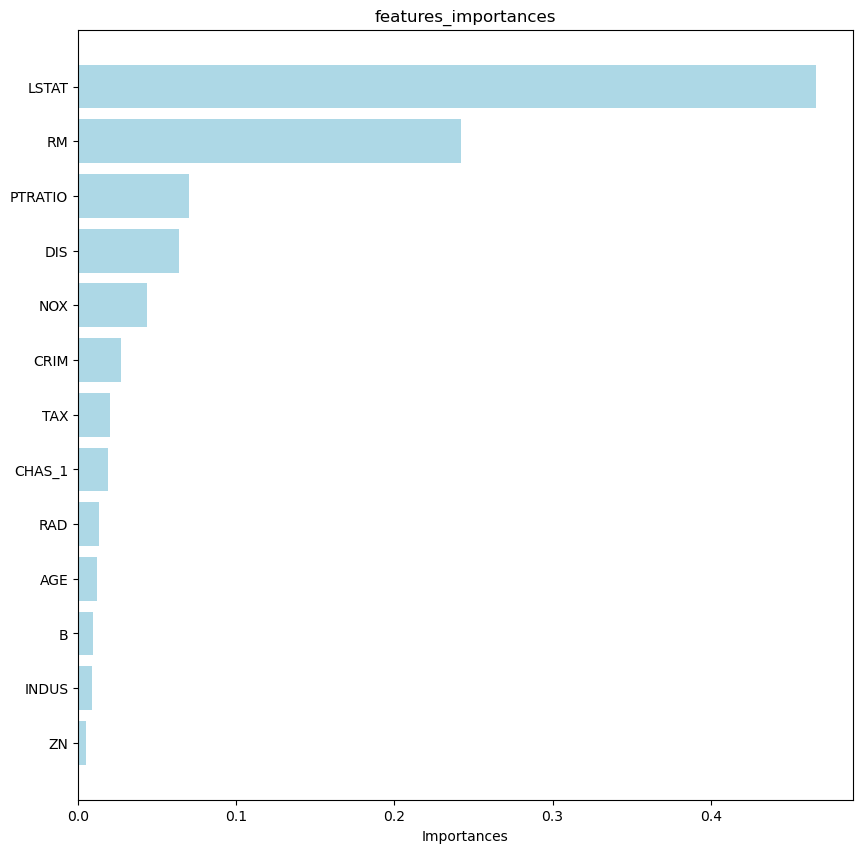

In [119]:
# jai la prediction mais je ne sais pas quel sont les variables qui ont joué dans la prediction

# importances des variables

features_importances = best_model.feature_importances_

importance_df = pd.DataFrame({
    "Features": x_train_transformed_df.columns,
    "Importances": features_importances
})

print(importance_df)

# trier les variaables par ordre decroissant
importance_df = importance_df.sort_values(by = "Importances", ascending = False)

plt.figure(figsize = (10, 10))
plt.barh(importance_df["Features"], importance_df["Importances"], color = "lightblue")
plt.title("features_importances")
plt.xlabel("Importances")
plt.gca().invert_yaxis()
plt.show()

# 4- LIGHTGBM

## Lightgbm sans optimisation (Lighgbm par defaut)

par rappport au xgboost ici:

- ici l'entrainement est beaucoup plus rapide rapport a xgboost

- la technique d'optimisation utilisée change egalement par gradient

In [121]:
!pip install lightgbm
import lightgbm as lgb

# initialisation du model LGBMRegressor
lgbm_model = lgb.LGBMRegressor(
    boosting_type = "gbdt" , # type de boosting gbdt Gradient, Boosting, Decision, Tree
    objective = "regression", # indique une tache de regression
    num_leaves = 23,  # le nombre maximal de feuille pour les arbres de base
    learning_rate = 0.05, # le taux d'apprentissage
    features_fraction = 0.9, # Fraction des colonnes à utiliser pour chaque itération, utilisée pour combattre le surapprentissage
    bagging_fraction = 0.8  # Fraction des données à utiliser pour chaque itération, utilisée pour combattre le surapprentissage
)

# entrainer mon model LGBMRegressor
lgbm_model.fit(x_train_transformed_df, y_train)

[LightGBM] [Warning] Unknown parameter: features_fraction
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Unknown parameter: features_fraction
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000945 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 898
[LightGBM] [Info] Number of data points in the train set: 354, number of used features: 13
[LightGBM] [Info] Start training from score 23.015819
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

LGBMRegressor(bagging_fraction=0.8, features_fraction=0.9, learning_rate=0.05,
              num_leaves=23, objective='regression')

In [123]:
# une fois modele entrainé, on fait la prediction
y_pred_train_lgbm = lgbm_model.predict(x_train_transformed_df)
y_pred_test_lgbm = lgbm_model.predict(x_test_transformed_df)

[LightGBM] [Warning] Unknown parameter: features_fraction
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Unknown parameter: features_fraction
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


In [125]:
# calcul des metriques / indicateurs de performances 

# fonction pour calculer le MAPE
def mean_absolute_percentage_erreur(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

# calcul des metriques sur ma base train

train_correlation = np.corrcoef(y_train, y_pred_train_lgbm)[0,1]
train_R2 = r2_score(y_train, y_pred_train_lgbm)
train_RMSE = np.sqrt(mean_squared_error(y_train, y_pred_train_lgbm ))
train_MAE = mean_absolute_error(y_train, y_pred_train_lgbm )
train_MAPE = mean_absolute_percentage_erreur(y_train, y_pred_train_lgbm )


#  calcul des metriques sur ma base de  test
                     
test_correlation = np.corrcoef(y_test, y_pred_test_lgbm)[0,1]
test_R2 = r2_score(y_test, y_pred_test_lgbm)
test_RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test_lgbm )) # c'est la difference entre la valeur observée et la valeur predite
test_MAE = mean_absolute_error(y_test, y_pred_test_lgbm )
test_MAPE = mean_absolute_percentage_erreur(y_test, y_pred_test_lgbm)


results = pd.DataFrame({
    "Metrique": ["correlation", "R2", "RMSE", "MAE", "MAPE"],
    "train": [train_correlation, train_R2, train_RMSE, train_MAE,  train_MAPE ],
    "test": [test_correlation, test_R2, test_RMSE,  test_MAE, test_MAPE ]
})

results = results.round(4)

results


,Metrique,train,test
0,correlation,0.9712,0.9113
1,R2,0.9413,0.8301
2,RMSE,2.2721,3.5577
3,MAE,1.4039,2.2499
4,MAPE,6.9215,11.2531


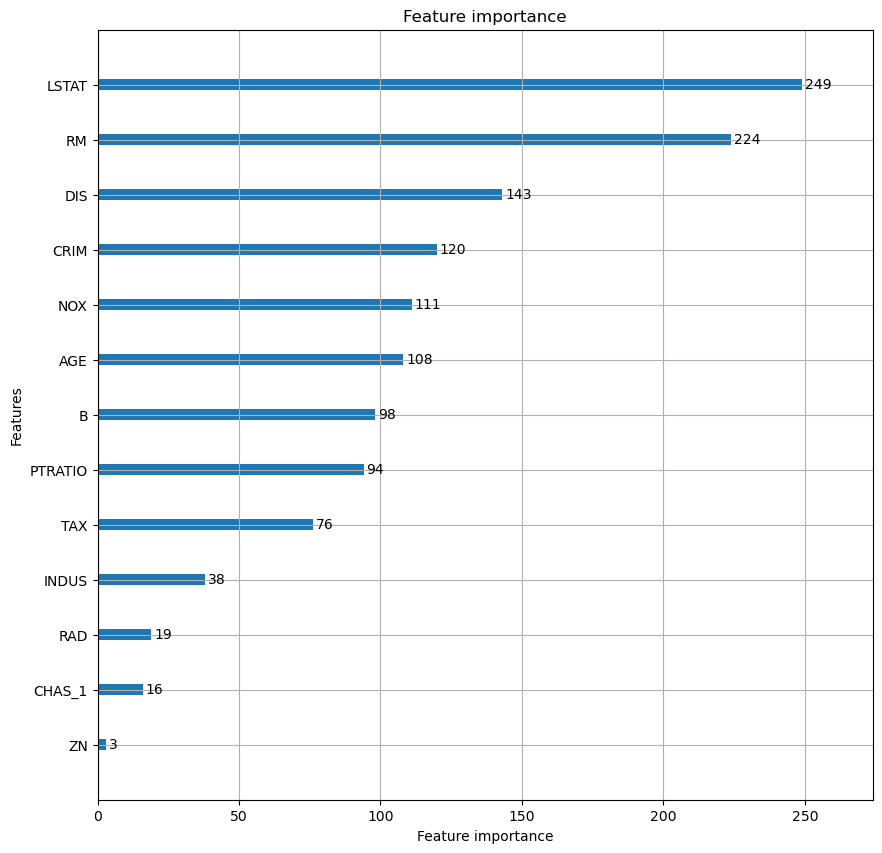

In [127]:
# jai la prediction mais je ne sais pas quel sont les variables qui ont joué dans la prediction

# dans ce modele de boostion en particulier on a la fonction plot_importance pour voir les variables les plus important

lgb.plot_importance(lgbm_model, figsize = (10, 10))
plt.show()


## lightgbm avec optimisation 

In [129]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Les hyperparamètres à optimiser

# Définition des paramètres à optimiser
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],  # taux d'apprentissage
    'n_estimators': [20, 40, 100],  # nombre d'arbres à utiliser
    'num_leaves': [31, 50, 100]  # nombre maximum de feuilles/observation pour les arbres de ma  base
}


In [131]:
import time
# Créer le modèle LightGBM de base
lightgbm_model = lgb.LGBMRegressor(random_state=42)

# Utilisation de GridSearchCV pour trouver les meilleurs paramètres
grid = GridSearchCV(estimator=lgbm_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Mesure du temps d'exécution/ le module time pour calculer le temps d'execution
start_time = time.time()
grid.fit(x_train_transformed_df, y_train)
end_time = time.time()

# Affichage des meilleurs paramètres trouvés
print("Best parameters found: ", grid.best_params_)

# Affichage du temps d'exécution
print("Time elapsed: ", end_time - start_time, "seconds")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Warning] Unknown parameter: features_fraction
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Unknown parameter: features_fraction
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 898
[LightGBM] [Info] Number of data points in the train set: 354, number of used features: 13
[LightGBM] [Info] Start training from score 23.015819
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

In [187]:
# Meilleurs paramètres obtenus
print(f"Meilleurs paramètres : {grid.best_params_}")

Meilleurs paramètres : {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 31}


In [133]:
best_model = grid.best_estimator_

y_train_pred_opt = best_model.predict(x_train_transformed_df)
y_test_pred_opt = best_model.predict(x_test_transformed_df)


[LightGBM] [Warning] Unknown parameter: features_fraction
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Unknown parameter: features_fraction
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


In [135]:
# calcul des metriques / indicateurs de performances 

# fonction pour calculer le MAPE
def mean_absolute_percentage_erreur(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

# calcul des metriques sur ma base train

train_correlation = np.corrcoef(y_train, y_train_pred_opt)[0,1]
train_R2 = r2_score(y_train, y_train_pred_opt)
train_RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred_opt ))
train_MAE = mean_absolute_error(y_train, y_train_pred_opt )
train_MAPE = mean_absolute_percentage_erreur(y_train, y_train_pred_opt )


#  calcul des metriques sur ma base de  test
                     
test_correlation = np.corrcoef(y_test, y_test_pred_opt)[0,1]
test_R2 = r2_score(y_test, y_test_pred_opt)
test_RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred_opt )) # c'est la difference entre la valeur observée et la valeur predite
test_MAE = mean_absolute_error(y_test, y_test_pred_opt )
test_MAPE = mean_absolute_percentage_erreur(y_test, y_test_pred_opt)


results = pd.DataFrame({
    "Metrique": ["correlation", "R2", "RMSE", "MAE", "MAPE"],
    "train": [train_correlation, train_R2, train_RMSE, train_MAE,  train_MAPE ],
    "test": [test_correlation, test_R2, test_RMSE,  test_MAE, test_MAPE ]
})

results = results.round(4)

results

,Metrique,train,test
0,correlation,0.9864,0.9209
1,R2,0.9723,0.8477
2,RMSE,1.5606,3.3684
3,MAE,0.9639,2.2460
4,MAPE,4.8403,11.2348


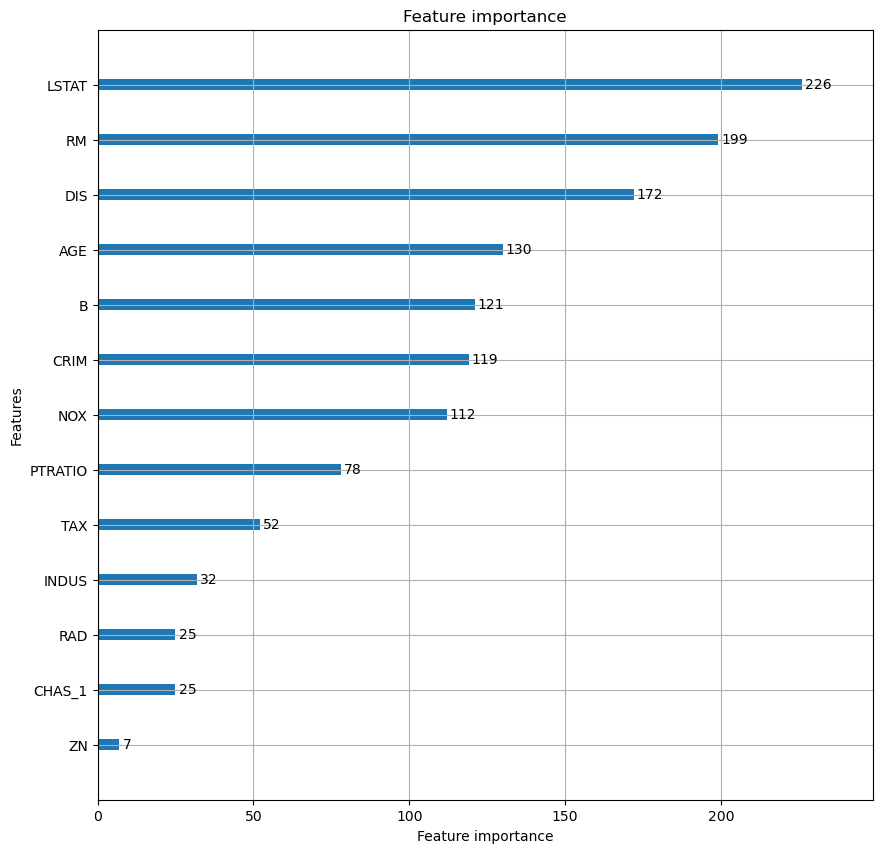

In [137]:
lgb.plot_importance(best_model, figsize = (10, 10))
plt.show()

# 5- CATBOOST


## catboost basique sans optimisation

on a vu tout a l'heure pour integrer les variables categorielle, on a fait du onehotencoding

- catboost =  c'est plus le modèle adapté, quand on veut intégré beaucoup de variables categorielle

In [195]:
! pip install catboost

   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB 393.8 kB/s eta 0:04:19
   ---------------------------------------- 0.1/101.7 MB 819.2 kB/s eta 0:02:05
   ---------------------------------------- 0.2/101.7 MB 1.3 MB/s eta 0:01:22
   ---------------------------------------- 0.4/101.7 MB 1.8 MB/s eta 0:00:56
   ---------------------------------------- 0.6/101.7 MB 2.3 MB/s eta 0:00:45
   ---------------------------------------- 0.7/101.7 MB 2.4 MB/s eta 0:00:42
   ---------------------------------------- 0.8/101.7 MB 2.2 MB/s eta 0:00:46
   ---------------------------------------- 1.1/101.7 MB 2.6 MB/s eta 0:00:39
   ---------------------------------------- 1.3/101.7 MB 2.8 MB/s eta 0:00:37
    --------------------------------------- 1.6/101.7 MB 3.0 MB/s eta 0:00:34
    --------------------------------------- 1.9/101.7 MB 3.3 MB/s eta 0:00

In [140]:
from catboost import CatBoostRegressor

# Initialisation du modèle CatBoostRegressor sans optimisation
catboost_model = CatBoostRegressor(
    iterations=1000,  # Nombre d'itérations (arbres)
    learning_rate=0.1,  # Taux d'apprentissage
    depth=6,  # Profondeur des arbres
    verbose=100  # Affiche les informations d'entraînement toutes les 100 itérations
)

# Entraînement du modèle sur les données d'entraînement
catboost_model.fit(x_train_transformed_df, y_train)

0:	learn: 8.8128433	total: 163ms	remaining: 2m 43s
100:	learn: 1.7424863	total: 305ms	remaining: 2.71s
200:	learn: 0.9714362	total: 420ms	remaining: 1.67s
300:	learn: 0.5949802	total: 530ms	remaining: 1.23s
400:	learn: 0.3945873	total: 643ms	remaining: 960ms
500:	learn: 0.2647614	total: 754ms	remaining: 751ms
600:	learn: 0.1839158	total: 868ms	remaining: 577ms
700:	learn: 0.1317779	total: 980ms	remaining: 418ms
800:	learn: 0.0918332	total: 1.09s	remaining: 272ms
900:	learn: 0.0675785	total: 1.2s	remaining: 132ms
999:	learn: 0.0490914	total: 1.33s	remaining: 0us


In [142]:
y_pred_train = catboost_model.predict(x_train_transformed_df)
y_pred_test = catboost_model.predict(x_test_transformed_df)




# calcul des metriques / indicateurs de performances 

# fonction pour calculer le MAPE
def mean_absolute_percentage_erreur(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

# calcul des metriques sur ma base train

train_correlation = np.corrcoef(y_train, y_pred_train)[0,1]
train_R2 = r2_score(y_train, y_pred_train)
train_RMSE = np.sqrt(mean_squared_error(y_train, y_pred_train ))
train_MAE = mean_absolute_error(y_train, y_pred_train )
train_MAPE = mean_absolute_percentage_erreur(y_train, y_pred_train )


#  calcul des metriques sur ma base de  test
                     
test_correlation = np.corrcoef(y_test, y_pred_test)[0,1]
test_R2 = r2_score(y_test, y_pred_test)
test_RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test )) # c'est la difference entre la valeur observée et la valeur predite
test_MAE = mean_absolute_error(y_test, y_pred_test )
test_MAPE = mean_absolute_percentage_erreur(y_test, y_pred_test)


results = pd.DataFrame({
    "Metrique": ["correlation", "R2", "RMSE", "MAE", "MAPE"],
    "train": [train_correlation, train_R2, train_RMSE, train_MAE,  train_MAPE ],
    "test": [test_correlation, test_R2, test_RMSE,  test_MAE, test_MAPE ]
})

results = results.round(4)

results

,Metrique,train,test
0,correlation,1.0000,0.9425
1,R2,1.0000,0.8840
2,RMSE,0.0491,2.9406
3,MAE,0.0378,1.8400
4,MAPE,0.1946,9.3513


   Features  Importances
0    CHAS_1     2.368627
1      CRIM     3.922743
2        ZN     1.085942
3     INDUS     1.890695
4       NOX     3.555887
5        RM    29.576645
6       AGE     5.129121
7       DIS     6.778900
8       RAD     3.020026
9       TAX     3.411826
10  PTRATIO     5.503641
11        B     2.929560
12    LSTAT    30.826387


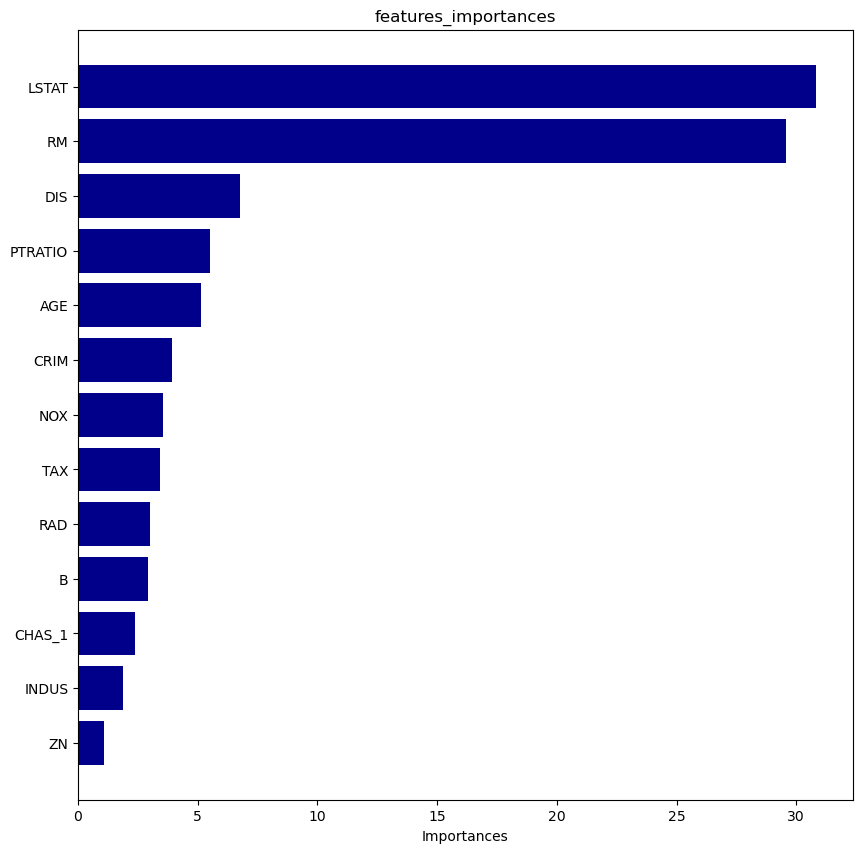

In [144]:

# importances des variables

features_importances = catboost_model.feature_importances_

importance_df = pd.DataFrame({
    "Features": x_train_transformed_df.columns,
    "Importances": features_importances
})

print(importance_df)

# trier les variaables par ordre decroissant
importance_df = importance_df.sort_values(by = "Importances", ascending = False)

plt.figure(figsize = (10, 10))
plt.barh(importance_df["Features"], importance_df["Importances"], color = "darkblue")
plt.title("features_importances")
plt.xlabel("Importances")
plt.gca().invert_yaxis()
plt.show()

## catboost avec optimisation des paramètres

In [146]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
import time

# Initialisation du modèle CatBoostRegressor
catboost_model = CatBoostRegressor(
    verbose=0  # Ne pas afficher les détails de l'entraînement pour chaque itération
)

# Définir les paramètres que vous souhaitez optimiser
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],  # Taux d'apprentissage
    'depth': [4, 6, 8],  # Profondeur maximale des arbres
    'l2_leaf_reg': [1, 3, 5],  # Coefficient de régularisation L2
    'iterations': [100, 200, 300]  # Nombre d'arbres à construire
}

# Utilisation de GridSearchCV pour optimiser les hyperparamètres
grid = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Mesure du temps d'exécution
start_time = time.time()
grid.fit(x_train_transformed_df, y_train)
end_time = time.time()

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [148]:
# Affichage des meilleurs paramètres trouvés
print("meilleur variables: ", grid.best_params_)

# Affichage du temps d'exécution
print("Time elapsed: ", end_time - start_time, "seconds")

meilleur variables:  {'depth': 4, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Time elapsed:  160.25218439102173 seconds


In [150]:
best_model = grid.best_estimator_

y_pred_train_opt = best_model.predict(x_train_transformed_df)
y_pred_test_opt  = best_model.predict(x_test_transformed_df)


# calcul des metriques / indicateurs de performances 

# fonction pour calculer le MAPE
def mean_absolute_percentage_erreur(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

# calcul des metriques sur ma base train

train_correlation = np.corrcoef(y_train, y_pred_train_opt)[0,1]
train_R2 = r2_score(y_train, y_pred_train_opt)
train_RMSE = np.sqrt(mean_squared_error(y_train, y_pred_train_opt ))
train_MAE = mean_absolute_error(y_train, y_pred_train_opt )
train_MAPE = mean_absolute_percentage_erreur(y_train, y_pred_train_opt )


#  calcul des metriques sur ma base de  test
                     
test_correlation = np.corrcoef(y_test, y_pred_test_opt)[0,1]
test_R2 = r2_score(y_test, y_pred_test_opt)
test_RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test_opt )) # c'est la difference entre la valeur observée et la valeur predite
test_MAE = mean_absolute_error(y_test, y_pred_test_opt )
test_MAPE = mean_absolute_percentage_erreur(y_test, y_pred_test_opt)


results = pd.DataFrame({
    "Metrique": ["correlation", "R2", "RMSE", "MAE", "MAPE"],
    "train": [train_correlation, train_R2, train_RMSE, train_MAE,  train_MAPE ],
    "test": [test_correlation, test_R2, test_RMSE,  test_MAE, test_MAPE ]
})

results = results.round(4)

results




,Metrique,train,test
0,correlation,0.9963,0.9435
1,R2,0.9925,0.8889
2,RMSE,0.8122,2.8771
3,MAE,0.6317,1.8849
4,MAPE,3.3218,9.8168


   Features  Importances
0    CHAS_1     1.376121
1      CRIM     2.680056
2        ZN     0.907758
3     INDUS     0.870990
4       NOX     5.755311
5        RM    32.742227
6       AGE     3.953102
7       DIS     7.283870
8       RAD     2.174032
9       TAX     3.263301
10  PTRATIO     4.617027
11        B     2.103329
12    LSTAT    32.272875


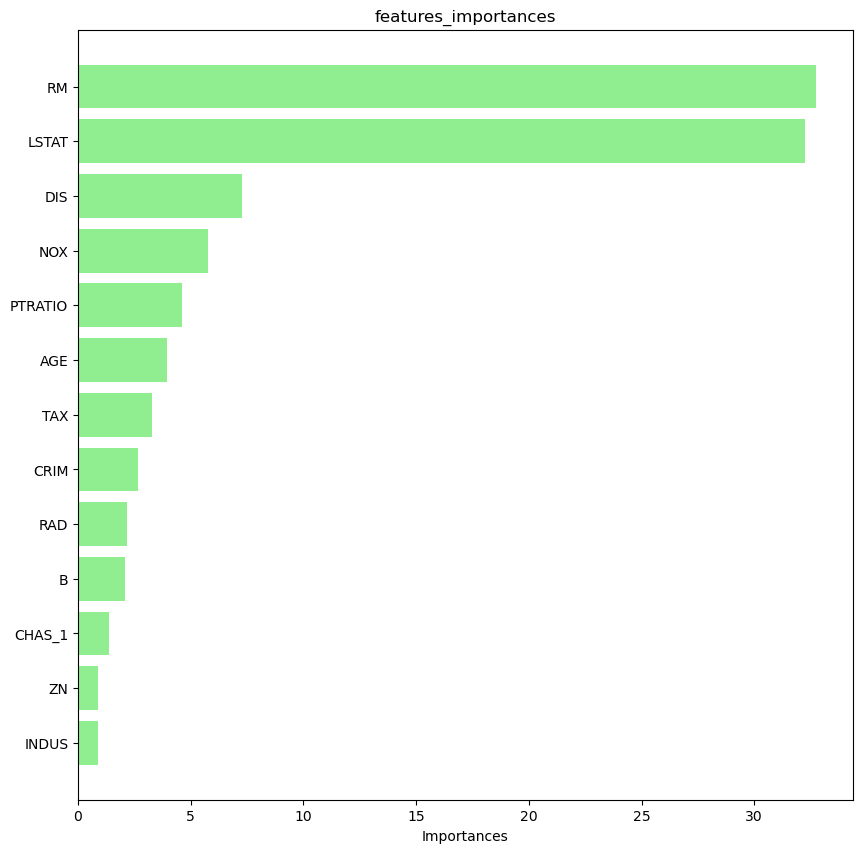

In [152]:
# importances des variables

features_importances = best_model.feature_importances_

importance_df = pd.DataFrame({
    "Features": x_train_transformed_df.columns,
    "Importances": features_importances
})

print(importance_df)

# trier les variaables par ordre decroissant
importance_df = importance_df.sort_values(by = "Importances", ascending = False)

plt.figure(figsize = (10, 10))
plt.barh(importance_df["Features"], importance_df["Importances"], color = "lightgreen")
plt.title("features_importances")
plt.xlabel("Importances")
plt.gca().invert_yaxis()
plt.show()

CONCLUSION: finalement après parcour des differents moedèles,  et vu que nous sommes en prédiction , l'interpretabilité  du modèle n'est pas forcement mise en avant; donc on peut se permettre des modèles assez complexe

le modèle XGBOOST justement  : perfome encore mieux que tous les autres modèles chalenger

R2_test = 89% contre R2_test = 82% de la foret aleatoire

RMSE_test = 2.85 contre RMSE_test = 3.32 de la foret aleatoire